In [1]:
import pandas as pd
import numpy as np
import datetime

# data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
def url_to_date(url):
    x = url.split('_')[2]
    x = x.strip('.csv').split('-')
    return int(x[0]), int(x[1])

In [55]:
f = open('urls_yellow_2017.txt', "r")
urls = f.read().splitlines()
f.close()

In [56]:
dates = []
yellow_trip_num = []
for url_addr in urls:
    y, m = url_to_date(url_addr)
    dates.append(datetime.date(y,m,1))
    data = pd.read_csv(url_addr)
    yellow_trip_num.append(data.shape[0])

yellow_df = pd.DataFrame({'date':dates, 'trips':yellow_trip_num})
yellow_df.to_csv('yellow_2017.csv', index = False)

In [147]:
#months_len = [31,28,31,30,31,30,31,31,30,31,30,31]
#bis_months_len = [31,29,31,30,31,30,31,31,30,31,30,31]

In [148]:
#norm_green_trip_num = np.array(green_trip_num)/np.array(months_len)
#norm_green_trip_num

In [ ]:
years_loc = mdates.YearLocator()   # every year
months_loc = mdates.MonthLocator()  # every month
dates_fmt = mdates.DateFormatter('%Y-%m')

In [ ]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()

#plt.plot_date(yellow_df['date'].values, yellow_df['count'].values,'y')
plt.plot_date(green_df['date'].values, green_df['count'].values,'g')

plt.ylim(0,10**7)
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Period', fontsize=12)
plt.ylabel('Trip count', fontsize=12)

ax.xaxis.set_major_locator(years_loc)
#ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_formatter(dates_fmt)

plt.show()

# Data from BigQuery

In [189]:
yellow_df = pd.read_csv('yellow.csv')
yellow_2017_df = pd.read_csv('yellow_2017.csv')
yellow_df = pd.concat([yellow_df, yellow_2017_df])
yellow_df = yellow_df.reset_index(drop = True)
green_df = pd.read_csv('green.csv')
uber_df = pd.read_csv('uber.csv')
uber_2017_df = pd.read_csv('uber_2017.csv')
uber_df = pd.concat([uber_df, uber_2017_df])
uber_df = uber_df.reset_index(drop = True)

In [190]:
trips_df = pd.merge(yellow_df, green_df, on='date', how='left')
trips_df = pd.merge(trips_df, uber_df, on='date', how='left')
trips_df.columns = ['date', 'y_trips', 'g_trips', 'u_trips']


In [191]:
trips_df['total_trips'] = trips_df['y_trips'].fillna(0) + trips_df['g_trips'].fillna(0) + trips_df['u_trips'].fillna(0)
trips_df.head()

,date,y_trips,g_trips,u_trips,total_trips
0,2009-01-01,14092413,NaN,NaN,14092413.0
1,2009-02-01,13380122,NaN,NaN,13380122.0
2,2009-03-01,14387371,NaN,NaN,14387371.0
3,2009-04-01,14294783,NaN,NaN,14294783.0
4,2009-05-01,14796313,NaN,NaN,14796313.0


In [192]:
years_loc = mdates.YearLocator()   # every year
months_loc = mdates.MonthLocator()  # every month
dates_fmt = mdates.DateFormatter('%Y-%m')

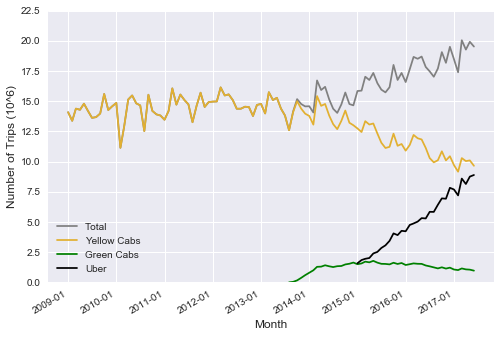

In [201]:
norm = 10.**6
fig, ax = plt.subplots(figsize=(8,5))


plt.plot_date(trips_df['date'].values, trips_df['total_trips'].values/norm,'gray')
plt.plot_date(trips_df['date'].values, trips_df['y_trips'].values/norm, '#E2B031')
plt.plot_date(trips_df['date'].values, trips_df['g_trips'].values/norm,'g')
plt.plot_date(trips_df['date'].values, trips_df['u_trips'].values/norm,'k')

plt.ylim(0,22.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips (10^6)', fontsize=12)
plt.legend(['Total','Yellow Cabs', 'Green Cabs', 'Uber'], loc=3)

ax.xaxis.set_major_locator(years_loc)
#ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_formatter(dates_fmt)

plt.savefig('time.png',bbox_inches='tight', dpi=150)
plt.show()

In [102]:
yellow_cost_df = pd.read_csv('yellow_cost.csv')
green_cost_df = pd.read_csv('green_cost.csv')

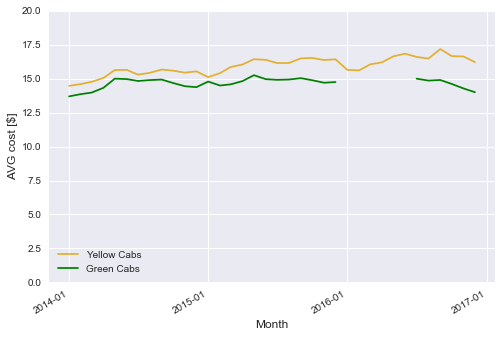

In [123]:
fig, ax = plt.subplots(figsize=(8,5));

plt.plot_date(yellow_cost_df['month'].values, yellow_cost_df['avg_cost'].values, '#E2B031')
plt.plot_date(green_cost_df['month'].values, green_cost_df['avg_cost'].values,'g')

plt.ylim(0,20)
plt.xticks(rotation=30, horizontalalignment='right')
plt.xlabel('Month', fontsize=12)
plt.ylabel('AVG cost [$]', fontsize=12)
plt.legend(['Yellow Cabs', 'Green Cabs'], loc= 3)

ax.xaxis.set_major_locator(years_loc)
#ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_formatter(dates_fmt)


plt.savefig('price.png',bbox_inches='tight', dpi=150)
plt.show()